In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/Users/marco/.fastai/data/mnist_sample/valid'),Path('/Users/marco/.fastai/data/mnist_sample/labels.csv'),Path('/Users/marco/.fastai/data/mnist_sample/train')]

In [4]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [5]:
PILImage.create(threes[3])

In [6]:
im3 = Image.open(threes[1])
im3

In [7]:
array(im3)[4:15,4:15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253],
       [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253],
       [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253],
       [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208]],
      dtype=uint8)

In [8]:
tensor(im3)[4:15,4:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253],
        [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208]],
       dtype=torch.uint8)

In [9]:
tens = tensor(im3)
df = pd.DataFrame(tens[4:15,4:25])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greens')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0,0,0,0


In [10]:
seven_tensors = [tensor(Image.open(s)) for s in sevens]
three_tensors = [tensor(Image.open(t)) for t in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

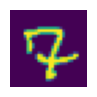

In [11]:
show_image(seven_tensors[2])

In [12]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [13]:
len(stacked_threes.shape)

3

In [14]:
stacked_threes.ndim

3

<Axes: >

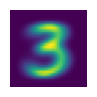

In [15]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [16]:
# show_image(stacked_threes.mean(1), figsize=(2,1000))
# show_image(stacked_sevens.mean(2), figsize=(2,1000))

<Axes: >

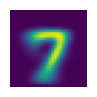

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

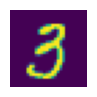

In [18]:
test_three = stacked_threes[10]
show_image(test_three)

In [19]:
def check_number_L1_norm(n: tensor):
    d3 = (n-mean3).abs().mean()
    d7 = (n-mean7).abs().mean()
    if d3 < d7:
        return f"Could be a 3, with a distance of {d3} against {d7}"
    return f"Could be a 7, with a distance of {d7} against {d3}"

In [20]:
check_number_L1_norm(stacked_sevens[100])

'Could be a 7, with a distance of 0.11215893179178238 against 0.12756186723709106'

In [21]:
check_number_L1_norm(stacked_threes[23])

'Could be a 3, with a distance of 0.1150953397154808 against 0.12074663490056992'

In [22]:
failed3 = 0
for t in stacked_threes:
    if check_number_L1_norm(t).startswith("Could be a 7"):
        failed3 = failed3 + 1
failed3

667

In [23]:
failed7 = 0
for s in stacked_sevens:
    if check_number_L1_norm(s).startswith("Could be a 3"):
        failed7 = failed7 + 1
failed7

24

In [24]:
def check_number_L2_norm(n: tensor):
    d3 = ((n - mean3)**2).mean().sqrt()
    d7 = ((n - mean7)**2).mean().sqrt()
    if d3 < d7:
        return f"Could be a 3, with a distance of {d3} against {d7}"
    return f"Could be a 7, with a distance of {d7} against {d3}"

In [25]:
failed3 = 0
for t in stacked_threes:
    if check_number_L2_norm(t).startswith("Could be a 7"):
        failed3 = failed3 + 1
failed3

283

In [26]:
failed7 = 0
for s in stacked_sevens:
    if check_number_L2_norm(s).startswith("Could be a 3"):
        failed7 = failed7 + 1
failed7

106

In [27]:
F.l1_loss(stacked_threes[4], mean3), F.l1_loss(stacked_threes[4], mean7)

(tensor(0.1300), tensor(0.1680))

In [28]:
F.mse_loss(stacked_sevens[22], mean7), F.mse_loss(stacked_sevens[22], mean3)

(tensor(0.0477), tensor(0.0904))

In [29]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [30]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(stacked_threes[12], mean3), mnist_distance(stacked_threes, mean3).mean()

(tensor(0.1286), tensor(0.1313))

In [31]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [32]:
(stacked_threes-mean3).shape

torch.Size([6131, 28, 28])

In [33]:
tensor([1,2,3]).shape, tensor(1).shape

(torch.Size([3]), torch.Size([]))

In [34]:
(tensor([1,1]) + tensor([[4,5],[6,7],[8,9]]))

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [35]:
(tensor([1,100]) + tensor([[[4,5],[6,7]],[[8,9],[4,5]],[[6,7],[8,9]],[[4,5],[6,7]],[[8,9],[1,2]]]))

tensor([[[  5, 105],
         [  7, 107]],

        [[  9, 109],
         [  5, 105]],

        [[  7, 107],
         [  9, 109]],

        [[  5, 105],
         [  7, 107]],

        [[  9, 109],
         [  2, 102]]])

In [36]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [37]:
tensor([1,1]) < tensor([0,5])

tensor([False,  True])

In [38]:
is_3(valid_3_tens[2]), is_3(valid_3_tens).float().mean()

(tensor(True), tensor(0.9168))

In [39]:
is_3(valid_7_tens[2]), is_3(valid_7_tens).float().mean()

(tensor(False), tensor(0.0146))

In [40]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [41]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [46]:
train_y = torch.tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [49]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [51]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
valid_x.shape, valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [52]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [112]:
weights = init_params((28*28, 1))
weights.shape

torch.Size([784, 1])

In [113]:
bias = init_params(1)
bias

tensor([-1.8413], requires_grad=True)

In [91]:
(train_x[0]*weights.T).sum() + bias, (train_x[0]*weights.T).shape, train_x[0].shape, weights.T.shape

(tensor([10.6080], grad_fn=<AddBackward0>),
 torch.Size([1, 784]),
 torch.Size([784]),
 torch.Size([1, 784]))

In [66]:
train_x[0].shape, train_x.shape, weights.shape, weights.T.shape

(torch.Size([784]),
 torch.Size([12396, 784]),
 torch.Size([784, 1]),
 torch.Size([1, 784]))

In [72]:
(weights.T@weights).shape, (weights@weights.T).shape

(torch.Size([1, 1]), torch.Size([784, 784]))

In [92]:
train_x.shape, weights.shape, (train_x@weights).shape

(torch.Size([12396, 784]), torch.Size([784, 1]), torch.Size([12396, 1]))

### N.1 equation in neural networks
batch@weights + bias

In [83]:
def linear1(xb): return xb@weights + bias

In [114]:
preds = linear1(train_x)
preds

tensor([[-17.0931],
        [-18.8599],
        [-15.0039],
        ...,
        [-17.7876],
        [  1.2620],
        [-18.5291]], grad_fn=<AddBackward0>)

In [93]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [96]:
corrects.float().mean().item()

0.6059212684631348

In [115]:
with torch.no_grad(): weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5062116980552673

In [133]:
def mnist_loss(predictions,targets): 
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

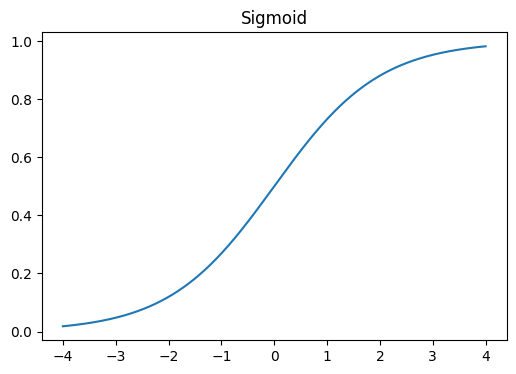

In [132]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(torch.tensor(min),torch.tensor(max), 1000)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [134]:
mnist_loss(preds, train_y).item()

0.49337175488471985

In [140]:
with torch.no_grad(): weights[209] *= 100.0001
preds = linear1(train_x)
mnist_loss(preds, train_y).item()

0.49337369203567505

In [143]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 2, 12,  1,  0, 11]),
 tensor([ 8, 13,  3,  6, 10]),
 tensor([ 7,  4, 14,  5,  9])]

In [148]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [151]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([19,  0, 14,  7, 10, 23]), ('t', 'a', 'o', 'h', 'k', 'x')),
 (tensor([20, 21,  1,  5, 22, 24]), ('u', 'v', 'b', 'f', 'w', 'y')),
 (tensor([ 6,  4, 25,  3, 12, 18]), ('g', 'e', 'z', 'd', 'm', 's')),
 (tensor([13,  9, 16,  2, 15, 17]), ('n', 'j', 'q', 'c', 'p', 'r')),
 (tensor([ 8, 11]), ('i', 'l'))]

In [184]:
weights = init_params((28*28,1))
bias = init_params(1)

In [185]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [186]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [155]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [156]:
preds = linear1(batch)
preds

tensor([[ -7.9278],
        [-14.6350],
        [  1.6133],
        [ -5.6718]], grad_fn=<AddBackward0>)

In [157]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7906, grad_fn=<MeanBackward0>)

In [158]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0051), tensor([-0.0356]))

In [187]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [162]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0103), tensor([-0.0712]))

In [165]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [188]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [167]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [189]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (xb>0.5).float() == yb
    return correct.float().mean()

In [169]:
batch_accuracy(batch, train_y[:4])

tensor(0.1521)

In [190]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [171]:
validate_epoch(linear1)

0.542

In [191]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7842

In [192]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=" ")

0.8794 0.9189 0.9385 0.9472 0.9502 0.9511 0.9536 0.956 0.9579 0.9594 0.9603 0.9638 0.9667 0.9672 0.9672 0.9682 0.9682 0.9682 0.9682 0.9687 

In [193]:
linear_model = nn.Linear(28*28, 1)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [194]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [195]:
opt = BasicOptim(linear_model.parameters(), lr)

In [196]:
def train_epoch(model):
    for xb, yb in dset:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [197]:
validate_epoch(linear_model)

0.5068

In [198]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(linear_model), end=" ")

In [199]:
train_model(linear_model, 20)

0.5068 0.5669 0.6938 0.6567 0.7144 0.7973 0.7969 0.7119 0.8037 0.8081 0.8398 0.8613 0.8305 0.8423 0.8735 0.8598 0.8481 0.8984 0.8789 0.8921 

In [200]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.5068 0.5078 0.5552 0.7002 0.6274 0.6831 0.7705 0.7378 0.8301 0.8515 0.8232 0.8222 0.8667 0.8735 0.8481 0.8877 0.855 0.9106 0.9004 0.8906 

In [201]:
dls = DataLoaders(dl, valid_dl)

In [205]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [206]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636626,0.503576,0.495584,00:00
1,0.557552,0.148930,0.856722,00:00
2,0.203258,0.202279,0.782630,00:00
3,0.088554,0.112290,0.884691,00:00
4,0.046198,0.080566,0.920510,00:00
5,0.029653,0.063965,0.935721,00:00
6,0.022863,0.053722,0.949460,00:00
7,0.019867,0.046952,0.954367,00:00
8,0.018368,0.042233,0.959274,00:00
9,0.017481,0.038785,0.964181,00:00


## Build a neural network
### Add some non linearity between 2 linear layers

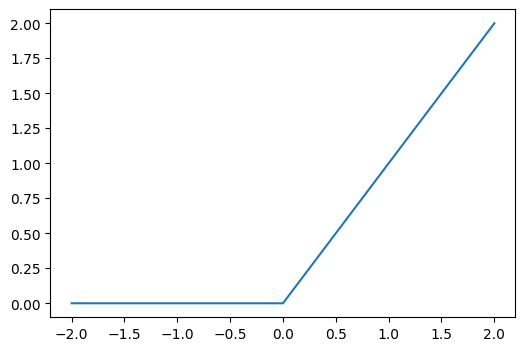

In [207]:
plot_function(F.relu)

In [208]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [211]:
for p in simple_net.parameters(): print(p.shape)

torch.Size([30, 784])
torch.Size([30])
torch.Size([1, 30])
torch.Size([1])


In [212]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [213]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.357018,0.380071,0.504416,00:00
1,0.163586,0.246152,0.725711,00:00
2,0.088586,0.119944,0.890579,00:00
3,0.056606,0.079299,0.928852,00:00
4,0.041934,0.061350,0.947007,00:00
5,0.034575,0.051462,0.959274,00:00
6,0.030449,0.045294,0.963199,00:00
7,0.027834,0.041110,0.965162,00:00
8,0.025987,0.038075,0.967615,00:00
9,0.024573,0.035771,0.968597,00:00


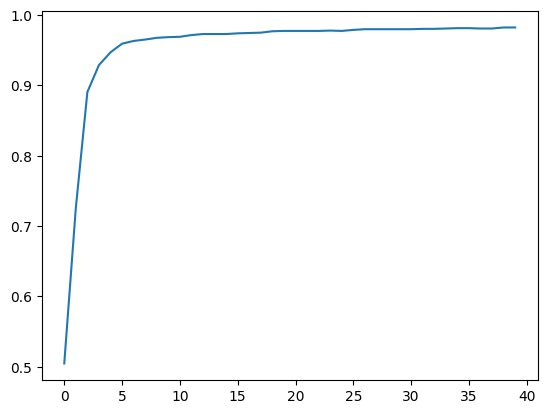

In [217]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [218]:
learn.recorder.values[-1][2]

0.98233562707901

In [220]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.092215,0.015407,0.996565,00:13


In [223]:
first(learn.parameters()).shape

torch.Size([64, 3, 7, 7])

In [224]:
for p in learn.parameters(): print(p.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
t